<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/problem7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

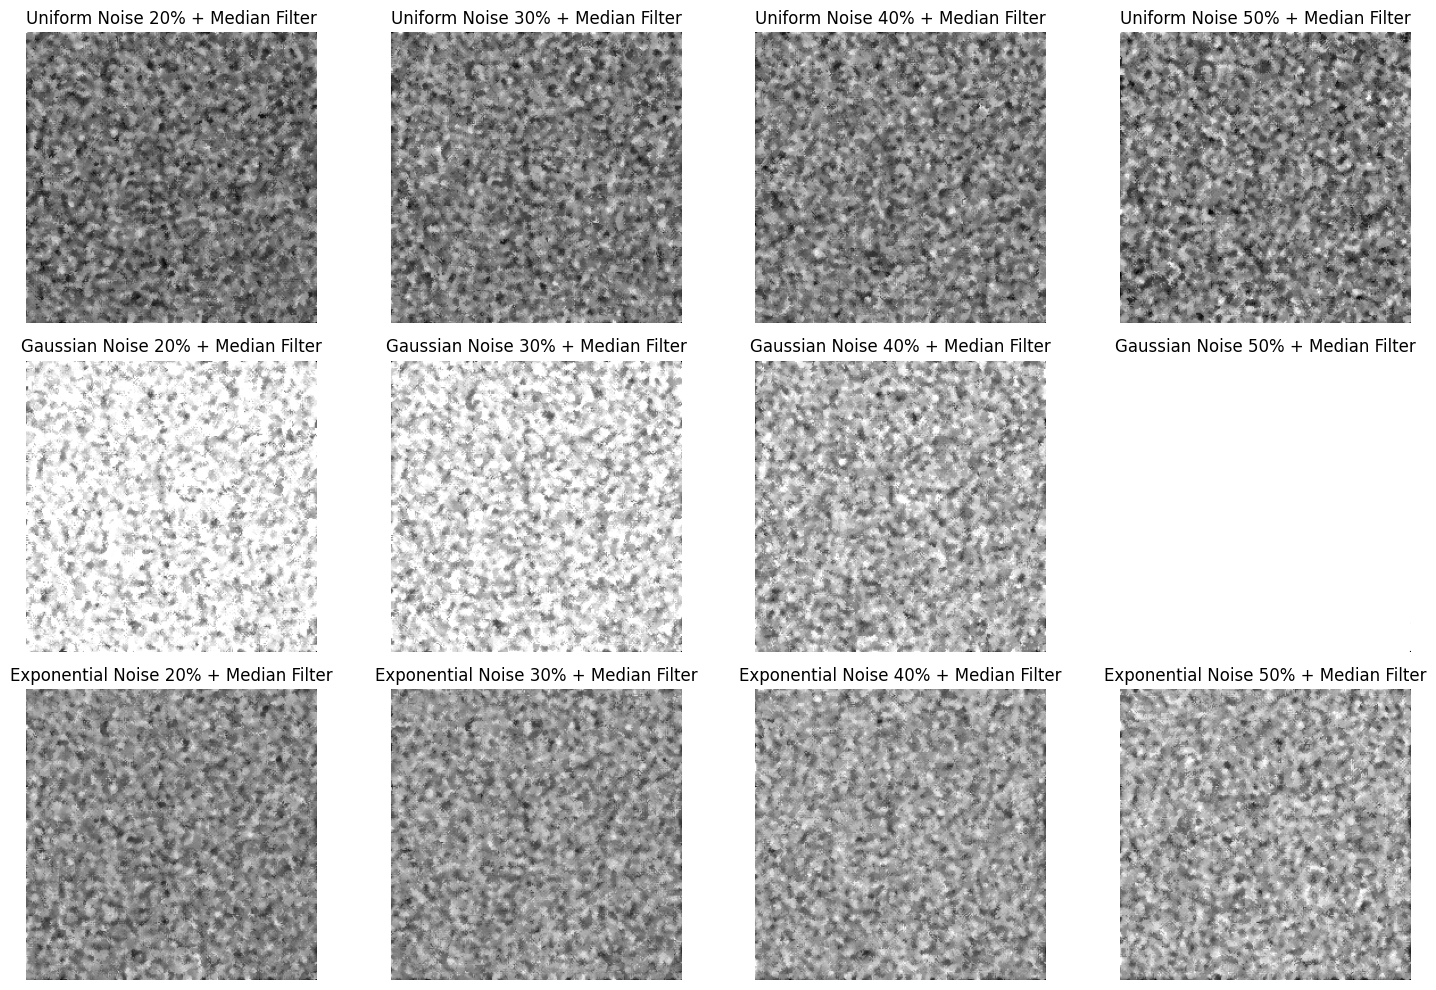

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import disk

# Function to generate a synthetic grayscale image
def generate_synthetic_image(size=(256, 256)):
    return np.random.randint(0, 256, size, dtype=np.uint8)

# Functions to apply different types of noise
def apply_uniform_noise(image, noise_ratio):
    noisy_image = image.copy()
    num_noise_pixels = int(noise_ratio * image.size)
    coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = np.random.choice([0, 255], num_noise_pixels)
    return noisy_image

def apply_gaussian_noise(image, noise_ratio):
    noisy_image = image.copy()
    num_noise_pixels = int(noise_ratio * image.size)
    mean = np.random.uniform(0, 255)
    std_dev = np.random.uniform(0, 50)
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(noisy_image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def apply_exponential_noise(image, noise_ratio):
    noisy_image = image.copy()
    num_noise_pixels = int(noise_ratio * image.size)
    noise = np.random.exponential(scale=1, size=num_noise_pixels) * 255
    coords = [np.random.randint(0, i - 1, num_noise_pixels) for i in image.shape]
    noisy_image[coords[0], coords[1]] = np.clip(noisy_image[coords[0], coords[1]] + noise, 0, 255).astype(np.uint8)
    return noisy_image

# Generate synthetic image
synthetic_image = generate_synthetic_image()

# Define noise ratios for analysis
noise_ratios = [0.2, 0.3, 0.4, 0.5]

# Prepare to plot results after applying median filter
fig, axes = plt.subplots(3, len(noise_ratios), figsize=(15, 10))

for i, ratio in enumerate(noise_ratios):
    # Uniform noise
    uniform_noisy = apply_uniform_noise(synthetic_image, ratio)
    uniform_filtered = median(uniform_noisy, disk(3))
    axes[0, i].imshow(uniform_filtered, cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Uniform Noise {int(ratio*100)}% + Median Filter')

    # Gaussian noise
    gaussian_noisy = apply_gaussian_noise(synthetic_image, ratio)
    gaussian_filtered = median(gaussian_noisy, disk(3))
    axes[1, i].imshow(gaussian_filtered, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Gaussian Noise {int(ratio*100)}% + Median Filter')

    # Exponential noise
    exponential_noisy = apply_exponential_noise(synthetic_image, ratio)
    exponential_filtered = median(exponential_noisy, disk(3))
    axes[2, i].imshow(exponential_filtered, cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title(f'Exponential Noise {int(ratio*100)}% + Median Filter')

plt.tight_layout()
plt.show()